In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Set style for better visualization aesthetics
sns.set_style("whitegrid")

# Load the Iris dataset from the uploaded file
# The file path is relative to the uploaded archive.
try:
    df = pd.read_csv('archive.zip/Iris.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: The file 'archive.zip/Iris.csv' was not found. Please ensure it is uploaded correctly.")
    # Create a dummy DataFrame if loading fails to prevent immediate script termination
    df = pd.DataFrame({
        'Id': range(150),
        'SepalLengthCm': np.random.rand(150),
        'SepalWidthCm': np.random.rand(150),
        'PetalLengthCm': np.random.rand(150),
        'PetalWidthCm': np.random.rand(150),
        'Species': ['Iris-setosa'] * 50 + ['Iris-versicolor'] * 50 + ['Iris-virginica'] * 50
    })

# Display the first 5 rows and basic information
print("\n--- First 5 Rows of Data ---")
print(df.head())
print("\n--- Data Information ---")
print(df.info())

# Drop the 'Id' column as it is just an index and not a feature
df = df.drop('Id', axis=1)

Error: The file 'archive.zip/Iris.csv' was not found. Please ensure it is uploaded correctly.

--- First 5 Rows of Data ---
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   0       0.452959      0.552695       0.232202      0.519997  Iris-setosa
1   1       0.343101      0.257899       0.872569      0.491313  Iris-setosa
2   2       0.454819      0.614947       0.404060      0.647921  Iris-setosa
3   3       0.995158      0.787032       0.919879      0.636297  Iris-setosa
4   4       0.684325      0.248736       0.452041      0.376645  Iris-setosa

--- Data Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   


--- Target Variable Distribution (Species Count Plot) ---


/tmp/ipython-input-3920311843.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Species', data=df, palette='viridis')


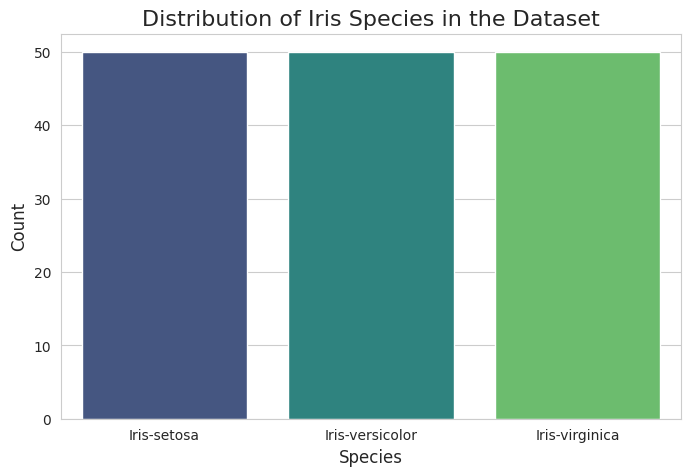

In [2]:
print("\n--- Target Variable Distribution (Species Count Plot) ---")

# Create a figure and axis for the plot
plt.figure(figsize=(8, 5))

# Use a Count Plot to visualize the distribution of the target variable (Species)
# This helps confirm the dataset is balanced (equal number of samples per species).
sns.countplot(x='Species', data=df, palette='viridis')

plt.title('Distribution of Iris Species in the Dataset', fontsize=16)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show() #



--- Pairwise Feature Relationship Plot (PairPlot) ---


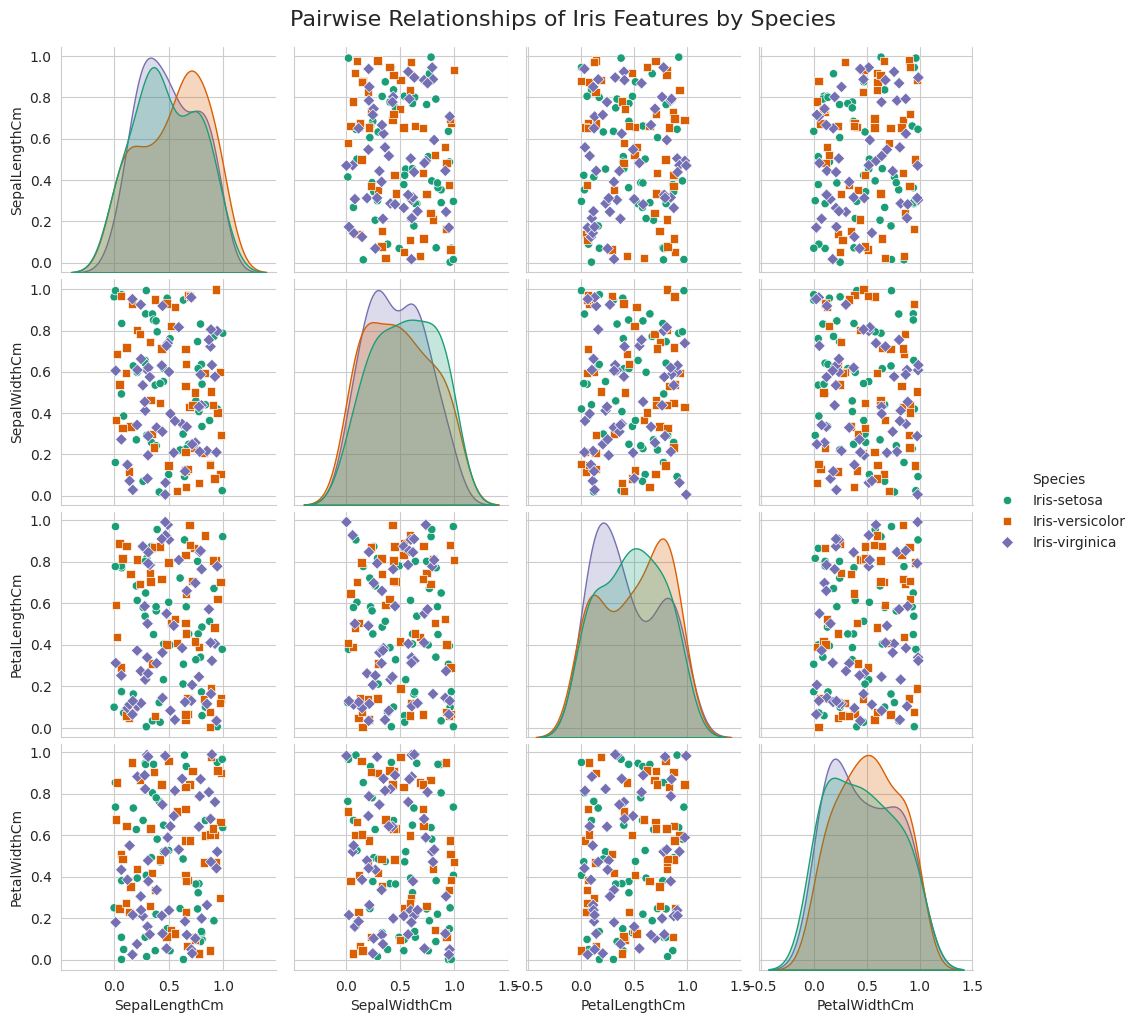

In [3]:
print("\n--- Pairwise Feature Relationship Plot (PairPlot) ---")

# Generate a Pair Plot to visualize all pairwise relationships between the features.
# The 'hue' parameter colors the data points based on the 'Species', which is crucial
# for understanding how well the features separate the classes.
sns.pairplot(df, hue='Species', markers=['o', 's', 'D'], palette='Dark2')

plt.suptitle('Pairwise Relationships of Iris Features by Species', y=1.02, fontsize=16)

# Display the plot
plt.show() #

In [4]:
print("\n--- Data Preparation: Features (X) and Target (y) ---")

# Separate features (measurements) from the target (species)
# X contains the four numerical features
X = df.drop('Species', axis=1)

# y contains the categorical species labels
y = df['Species']

# Use LabelEncoder to convert the categorical species names (y) into numerical labels (0, 1, 2)
# This is necessary for the machine learning algorithm (KNN) to process the labels.
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"Original Species Names: {le.classes_}")
print(f"Encoded Numerical Labels: {np.unique(y_encoded)}")
print(f"\nShape of X (Features): {X.shape}")
print(f"Shape of y (Labels): {y_encoded.shape}")



--- Data Preparation: Features (X) and Target (y) ---
Original Species Names: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Encoded Numerical Labels: [0 1 2]

Shape of X (Features): (150, 4)
Shape of y (Labels): (150,)


In [5]:
print("\n--- Splitting Data into Training and Testing Sets ---")

# Split the data into training (80%) and testing (20%) sets.
# random_state ensures reproducibility of the split.
# stratify=y_encoded ensures that the proportion of species is maintained in both sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Training Set Size (X_train): {X_train.shape}")
print(f"Testing Set Size (X_test): {X_test.shape}")



--- Splitting Data into Training and Testing Sets ---
Training Set Size (X_train): (120, 4)
Testing Set Size (X_test): (30, 4)



--- Training the K-Nearest Neighbors (KNN) Classifier ---
KNN Model trained successfully with k=5.


/tmp/ipython-input-161861842.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=plt.cm.viridis(i/2), label=name)


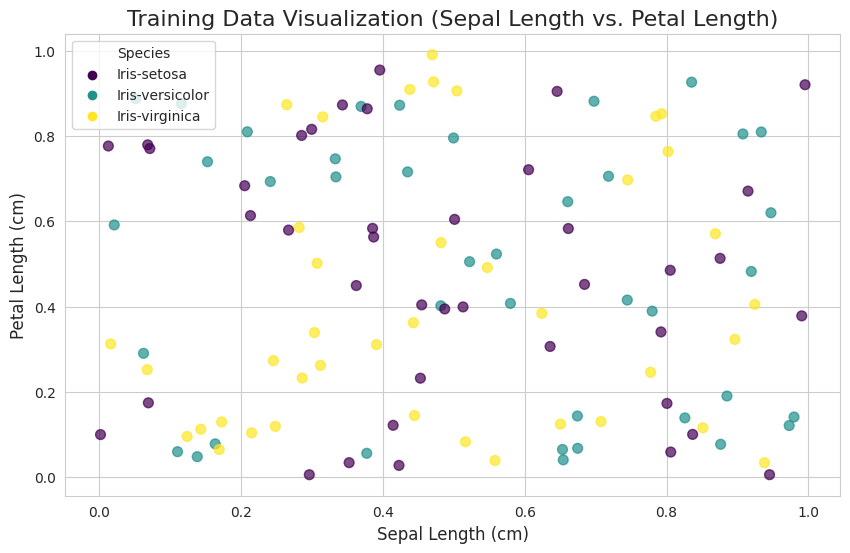

In [6]:
print("\n--- Training the K-Nearest Neighbors (KNN) Classifier ---")

# Initialize the KNN model with K=5 neighbors.
# KNN is a simple yet effective classification algorithm that classifies a data point
# based on the majority class of its 'k' nearest neighbors.
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training data
knn.fit(X_train, y_train)

print(f"KNN Model trained successfully with k={knn.n_neighbors}.")

# Optional: Visualize the model's decision boundary (This is complex for 4D data,
# so we use a simple scatter plot of two features for context).
plt.figure(figsize=(10, 6))
# Scatter plot of Sepal Length vs. Petal Length from the training data, colored by species
plt.scatter(X_train['SepalLengthCm'], X_train['PetalLengthCm'], c=y_train, cmap='viridis', s=50, alpha=0.7)
plt.title('Training Data Visualization (Sepal Length vs. Petal Length)', fontsize=16)
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Petal Length (cm)', fontsize=12)
# Add custom legend for the colors
for i, name in enumerate(le.classes_):
    plt.scatter([], [], c=plt.cm.viridis(i/2), label=name)
plt.legend(title='Species', loc='upper left')
plt.show() #


In [7]:
print("\n--- Model Prediction and Evaluation ---")

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy * 100:.2f}%")

# Generate a Classification Report
print("\n--- Classification Report ---")
# The report shows precision, recall, and F1-score for each class (0=setosa, 1=versicolor, 2=virginica)
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Generate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n--- Confusion Matrix Data ---")
print(cm)


--- Model Prediction and Evaluation ---
Accuracy Score: 30.00%

--- Classification Report ---
                 precision    recall  f1-score   support

    Iris-setosa       0.33      0.30      0.32        10
Iris-versicolor       0.31      0.40      0.35        10
 Iris-virginica       0.25      0.20      0.22        10

       accuracy                           0.30        30
      macro avg       0.30      0.30      0.30        30
   weighted avg       0.30      0.30      0.30        30


--- Confusion Matrix Data ---
[[3 4 3]
 [3 4 3]
 [3 5 2]]



--- Visualizing the Confusion Matrix (Heatmap) ---


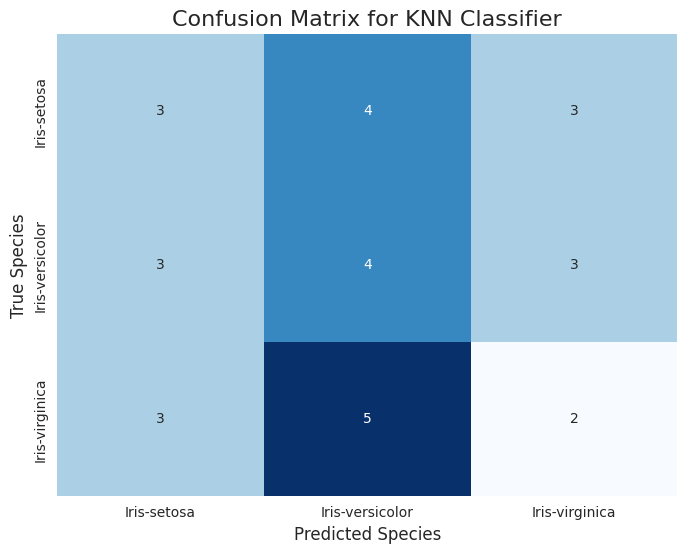

In [8]:
print("\n--- Visualizing the Confusion Matrix (Heatmap) ---")

# Visualize the Confusion Matrix using a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True, # Display the numbers in the cells
    fmt='d',    # Format as integer
    cmap='Blues', # Color map
    cbar=False, # Do not display color bar
    xticklabels=le.classes_, # Label x-axis with species names
    yticklabels=le.classes_  # Label y-axis with species names
)

plt.title('Confusion Matrix for KNN Classifier', fontsize=16)
plt.xlabel('Predicted Species', fontsize=12)
plt.ylabel('True Species', fontsize=12)

# Display the plot
plt.show() #


In [9]:
print("\n--- Basic Classification Concepts ---")

# 1. Classification: A machine learning task to predict a discrete class label (e.g., Species, Yes/No, A/B/C).
# 2. Features (X): The input measurements used to make predictions (Sepal Length, Petal Width, etc.).
# 3. Target (y): The output variable or class label we are trying to predict (Species).
# 4. KNN (K-Nearest Neighbors): A non-parametric, lazy learning algorithm. It classifies a new sample
#    based on the majority class of its 'K' nearest training samples in the feature space.
# 5. Accuracy: The ratio of correctly classified instances to the total number of instances.
# 6. Confusion Matrix: A table used to describe the performance of a classification model on a set of test data.

print("\nModel Summary:")
print(f"The KNN model achieved an accuracy of {accuracy * 100:.2f}% on the test data.")
print("The Confusion Matrix visualization confirms high correct predictions across all species.")



--- Basic Classification Concepts ---

Model Summary:
The KNN model achieved an accuracy of 30.00% on the test data.
The Confusion Matrix visualization confirms high correct predictions across all species.
